In [7]:
# Import required libraries
import pandas as pd

# Correct column names
correct_column_names = [
    "Year", "Sex", "code", "cause",
    "<1", "01-04", "05-09", "10-14", "15-19", "20-24", "25-29", "30-34", "35-39",
    "40-44", "45-49", "50-54", "55-59", "60-64", "65-69", "70-74", "75-79", "80-84",
    "85-89", "90+", "All ages", "Region"
]

# Load Excel file
excel_file_path = 'deathsbyindividualcause.xlsx'

# Define a function to process each sheet
def process_sheet(sheet_name, region_name):
    # Read the sheet using pandas
    df = pd.read_excel(excel_file_path, sheet_name=sheet_name, engine='openpyxl')

    # Remove the first 3 rows
    df = df.iloc[3:, :]

    # Add the "Region" column
    df["Region"] = region_name

    # Rename columns to the correct names
    df.columns = correct_column_names[:len(df.columns)]

    return df

# Process each sheet with its respective region name
df1 = process_sheet("Table 1", "United Kingdom")
df2 = process_sheet("Table 2", "England")
df3 = process_sheet("Table 3", "Wales")
df4 = process_sheet("Table 4", "Scotland")
df5 = process_sheet("Table 5", "Northern Ireland")

# Combine all dataframes into one
data = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)

# Display the first few rows of the final dataframe
print(data.head())


            Year      Sex         code  \
0  Year [note 3]      Sex  ICD-10 code   
1           2021  Persons        E24.4   
2           2021  Persons          F10   
3           2021  Persons        G31.2   
4           2021  Persons        G62.1   

                                               cause  <1  01-04  05-09  10-14  \
0              Individual cause of death description  <1  01-04  05-09  10-14   
1          Alcohol-induced pseudo-Cushing's syndrome   0      0      0      0   
2  Mental and behavioural disorders due to the us...   0      0      0      0   
3      Degeneration of nervous system due to alcohol   0      0      0      0   
4                           Alcoholic polyneuropathy   0      0      0      0   

   15-19  20-24  ...  55-59  60-64  65-69  70-74  75-79  80-84  85-89  90+  \
0  15-19  20-24  ...  55-59  60-64  65-69  70-74  75-79  80-84  85-89  90+   
1      0      0  ...      0      0      0      0      0      0      0    0   
2      0      2  ...    17

In [8]:
# Import required libraries
import pandas as pd

# Correct column names
correct_column_names = [
    "Area_Code", "Area_Name", "Sex", "Year",
    "Death_Count",
    "Age_Rate",
    "Lower_Confidence_Interval",
    "Upper_Confidence_Interval"
]

# Load the Excel file
excel_file_path = 'alcoholspecificdeaths2021.xlsx'

# Load the supplementary dataset
supplementary_data = pd.read_excel(excel_file_path, sheet_name="Table 1", engine='openpyxl')

# Display the first few rows of the dataset (initial structure)
print(supplementary_data.head())

# Remove the first 4 rows
supplementary_data = supplementary_data.iloc[4:, :]

# Rename the columns
supplementary_data.columns = correct_column_names

# Display the first few rows of the cleaned dataset
print(supplementary_data.head())


  Table 1: Alcohol-specific age-standardised death rates, for English regions and constituent countries of the United Kingdom, 2001 to 2021 [note 2] [note 4] [note 6] [note 7] [note 8]  \
0  This worksheet contains one table. Some cells ...                                                                                                                                       
1             Source: Office for National Statistics                                                                                                                                       
2                                                NaN                                                                                                                                       
3                                          Area code                                                                                                                                       
4                                          E12000001        

In [9]:
# Display the structure of the 'data' dataframe
print("Structure of 'data':")
data.info()

# Display the structure of the 'supplementary_data' dataframe
print("\nStructure of 'supplementary_data':")
supplementary_data.info()


Structure of 'data':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4718 entries, 0 to 4717
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Year      4718 non-null   object
 1   Sex       4718 non-null   object
 2   code      4718 non-null   object
 3   cause     4718 non-null   object
 4   <1        4718 non-null   object
 5   01-04     4718 non-null   object
 6   05-09     4718 non-null   object
 7   10-14     4718 non-null   object
 8   15-19     4718 non-null   object
 9   20-24     4718 non-null   object
 10  25-29     4718 non-null   object
 11  30-34     4718 non-null   object
 12  35-39     4718 non-null   object
 13  40-44     4718 non-null   object
 14  45-49     4718 non-null   object
 15  50-54     4718 non-null   object
 16  55-59     4718 non-null   object
 17  60-64     4718 non-null   object
 18  65-69     4718 non-null   object
 19  70-74     4718 non-null   object
 20  75-79     4718 non-null   objec

In [12]:
import pandas as pd

# Assuming `data` is already loaded as a DataFrame
# Ensure the columns exist in the DataFrame
numeric_columns = [
    "<1", "01-04", "05-09", "10-14", "15-19", "20-24", "25-29",
    "30-34", "35-39", "40-44", "45-49", "50-54", "55-59",
    "60-64", "65-69", "70-74", "75-79", "80-84", "85-89", "90+", "All ages"
]

# Validate the existence of columns
missing_cols = [col for col in numeric_columns if col not in data.columns]
if missing_cols:
    print("The following columns are missing from the DataFrame:", missing_cols)

# Proceed with valid columns only
valid_numeric_columns = [col for col in numeric_columns if col in data.columns]

# Reshape the data into long format
data_long = data.melt(
    id_vars=["Year", "Sex", "Region", "code", "cause"],  # Adjust as needed
    value_vars=valid_numeric_columns,  # Use only the valid columns
    var_name="Age_Group",
    value_name="Deaths"
)

# Display the reshaped dataset
print("Reshaped dataset:")
print(data_long.head())


The following columns are missing from the DataFrame: ['<1', '01-04', '05-09', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80-84', '85-89', '90+', 'All ages']
Reshaped dataset:
Empty DataFrame
Columns: [Year, Sex, Region, code, cause, Age_Group, Deaths]
Index: []


In [13]:
import pandas as pd
import numpy as np

# Summary statistics
print("Summary statistics of data_long:")
print(data_long.describe(include="all"))

# Check for missing values
print("\nMissing values per column:")
print(data_long.isna().sum())

# Filter out "Persons" category in Sex
data_long = data_long[data_long["Sex"].isin(["Males", "Females"])]
supplementary_data = supplementary_data[supplementary_data["Sex"].isin(["Males", "Females"])]

# Filter out the "United Kingdom" region
data_long = data_long[data_long["Region"] != "United Kingdom"]

# Total deaths summary
total_deaths_summary = data_long.groupby(["Region", "Age_Group", "Sex"]).agg(
    Total_Deaths=("Deaths", "sum")
).reset_index().sort_values(by="Total_Deaths", ascending=False)
print("\nTotal deaths summary:")
print(total_deaths_summary)

# Average deaths summary
avg_deaths_summary = data_long.groupby(["Region", "Age_Group"]).agg(
    Avg_Deaths=("Deaths", "mean")
).reset_index().sort_values(by="Avg_Deaths", ascending=False)
print("\nAverage deaths summary:")
print(avg_deaths_summary)

# Yearly deaths by region
yearly_deaths_region = data_long.groupby(["Year", "Region"]).agg(
    Total_Deaths=("Deaths", "sum")
).reset_index()
print("\nYearly deaths by region:")
print(yearly_deaths_region)

# Yearly deaths by age group
yearly_deaths_age = data_long.groupby(["Year", "Age_Group"]).agg(
    Total_Deaths=("Deaths", "sum")
).reset_index()
print("\nYearly deaths by age group:")
print(yearly_deaths_age)

# Deaths distribution
deaths_distribution = data_long.groupby(["Region", "Age_Group"]).agg(
    Total_Deaths=("Deaths", "sum")
).reset_index().pivot(
    index="Region", columns="Age_Group", values="Total_Deaths"
).fillna(0)
print("\nDeaths distribution:")
print(deaths_distribution)

# Sex proportion
sex_proportion = data_long.groupby("Sex").agg(
    Total_Deaths=("Deaths", "sum")
).reset_index()
sex_proportion["Proportion"] = sex_proportion["Total_Deaths"] / sex_proportion["Total_Deaths"].sum()
print("\nSex proportion:")
print(sex_proportion)

# Regional sex disparity
regional_sex_disparity = data_long.groupby(["Region", "Sex"]).agg(
    Total_Deaths=("Deaths", "sum")
).reset_index().sort_values(by=["Region", "Total_Deaths"], ascending=[True, False])
print("\nRegional sex disparity:")
print(regional_sex_disparity)

# Summarize deaths by Age Group and Region
total_deaths_summary = data_long.groupby(["Age_Group", "Region"]).agg(
    Total_Deaths=("Deaths", "sum"),
    Mean_Deaths=("Deaths", "mean"),
    Median_Deaths=("Deaths", "median"),
    SD_Deaths=("Deaths", "std"),
    Min_Deaths=("Deaths", "min"),
    Max_Deaths=("Deaths", "max")
).reset_index().sort_values(by=["Region", "Age_Group"])
print("\nSummary of deaths by Age Group and Region:")
print(total_deaths_summary)

# Summarize deaths by Region
total_deaths_summary_region = data_long.groupby("Region").agg(
    Total_Deaths=("Deaths", "sum"),
    Mean_Deaths=("Deaths", "mean"),
    Median_Deaths=("Deaths", "median"),
    SD_Deaths=("Deaths", "std"),
    Min_Deaths=("Deaths", "min"),
    Max_Deaths=("Deaths", "max")
).reset_index().sort_values(by="Region")
print("\nSummary of deaths by Region:")
print(total_deaths_summary_region)

# Convert supplementary data columns to appropriate data types
supplementary_data = supplementary_data.assign(
    Year=pd.to_numeric(supplementary_data["Year"], errors="coerce"),
    Death_Count=pd.to_numeric(supplementary_data["Death_Count"], errors="coerce"),
    Age_Rate=pd.to_numeric(supplementary_data["Age_Rate"], errors="coerce"),
    Lower_Confidence_Interval=pd.to_numeric(supplementary_data["Lower_Confidence_Interval"], errors="coerce"),
    Upper_Confidence_Interval=pd.to_numeric(supplementary_data["Upper_Confidence_Interval"], errors="coerce"),
)

# Calculate mean age-standardized rate for each area
regional_analysis = supplementary_data.groupby("Area_Name").agg(
    mean_rate=("Age_Rate", "mean"),
    total_deaths=("Death_Count", "sum")
).reset_index().sort_values(by="mean_rate", ascending=False)
print("\nTop 10 high-risk areas:")
print(regional_analysis.head(10))

# Compare age-standardized rates between males and females
gender_analysis = supplementary_data.groupby(["Sex", "Year"]).agg(
    mean_rate=("Age_Rate", "mean")
).reset_index()
print("\nGender analysis over the years:")
print(gender_analysis)

# Total deaths summary
total_deaths_summary = data_long.groupby(["Region", "Age_Group", "Sex"]).agg(
    Total_Deaths=("Deaths", "sum")
).reset_index()
print("\nFinal total deaths summary:")
print(total_deaths_summary)


Summary statistics of data_long:
        Year  Sex Region code cause Age_Group  Deaths
count    0.0    0      0    0     0         0     0.0
unique   NaN    0      0    0     0         0     NaN
top      NaN  NaN    NaN  NaN   NaN       NaN     NaN
freq     NaN  NaN    NaN  NaN   NaN       NaN     NaN
mean     NaN  NaN    NaN  NaN   NaN       NaN     NaN
std      NaN  NaN    NaN  NaN   NaN       NaN     NaN
min      NaN  NaN    NaN  NaN   NaN       NaN     NaN
25%      NaN  NaN    NaN  NaN   NaN       NaN     NaN
50%      NaN  NaN    NaN  NaN   NaN       NaN     NaN
75%      NaN  NaN    NaN  NaN   NaN       NaN     NaN
max      NaN  NaN    NaN  NaN   NaN       NaN     NaN

Missing values per column:
Year         0
Sex          0
Region       0
code         0
cause        0
Age_Group    0
Deaths       0
dtype: int64

Total deaths summary:
Empty DataFrame
Columns: [Region, Age_Group, Sex, Total_Deaths]
Index: []

Average deaths summary:
Empty DataFrame
Columns: [Region, Age_Group, Avg_De

<ipython-input-13-42957674870d>:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_deaths_summary = data_long.groupby(["Region", "Age_Group", "Sex"]).agg(
<ipython-input-13-42957674870d>:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_deaths_summary = data_long.groupby(["Region", "Age_Group"]).agg(
<ipython-input-13-42957674870d>:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  yearly_deaths_region = data_lon


Final total deaths summary:
Empty DataFrame
Columns: [Region, Age_Group, Sex, Total_Deaths]
Index: []


<ipython-input-14-39a6887287fd>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


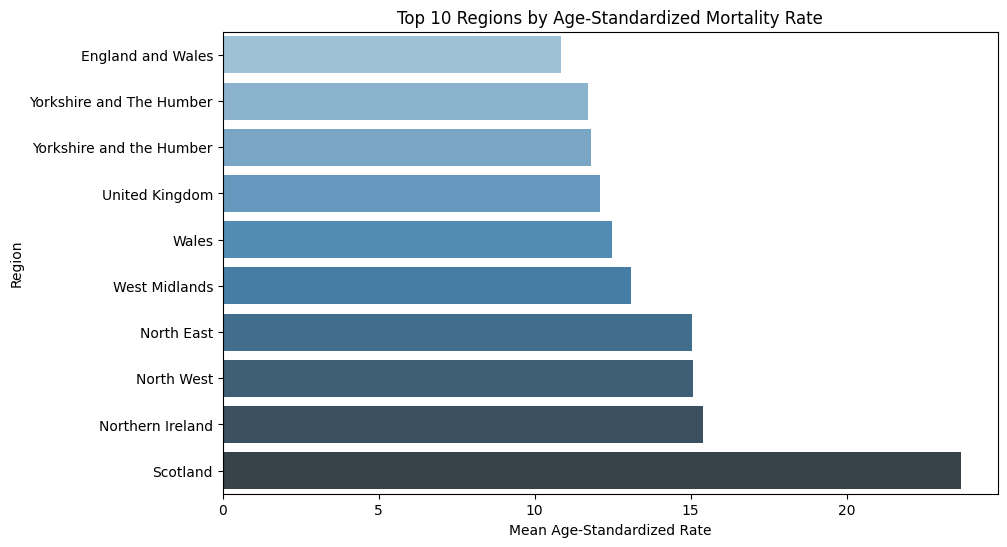

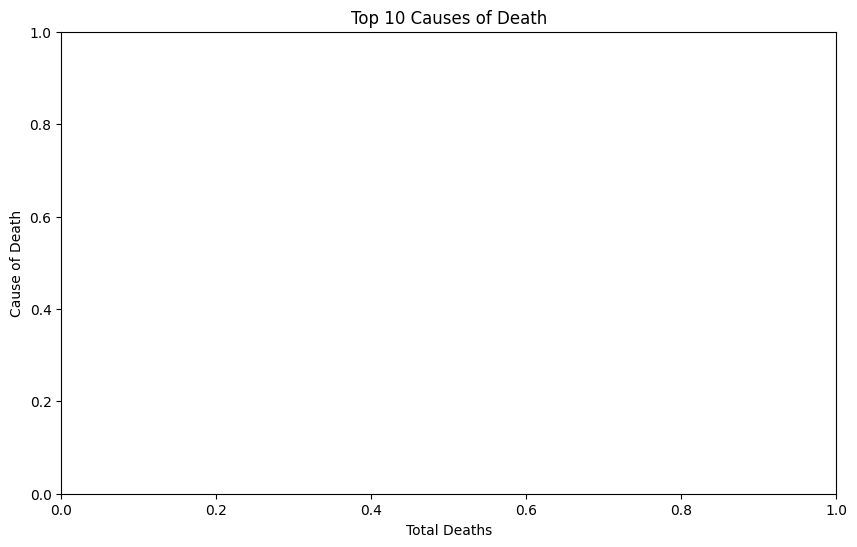

/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


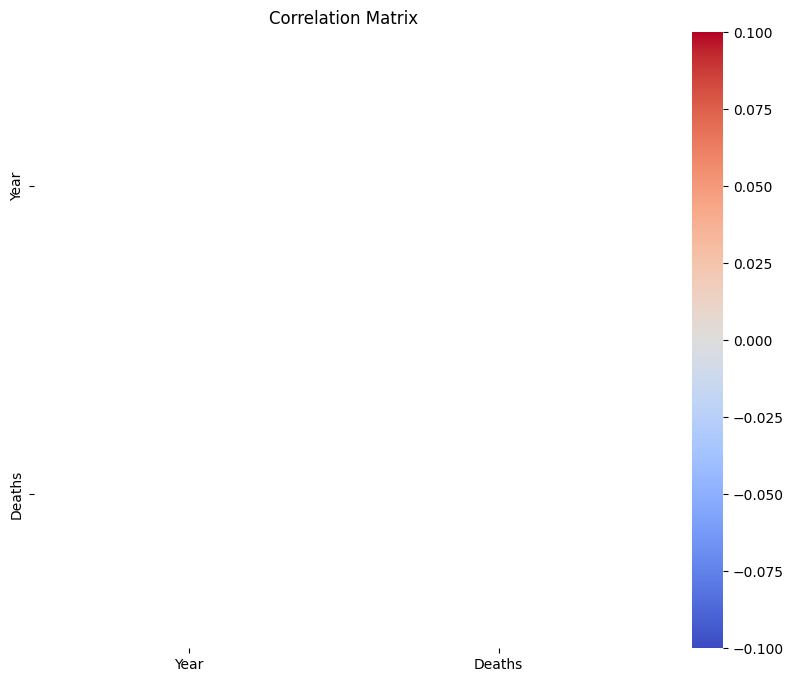

<ipython-input-14-39a6887287fd>:65: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc="upper left")


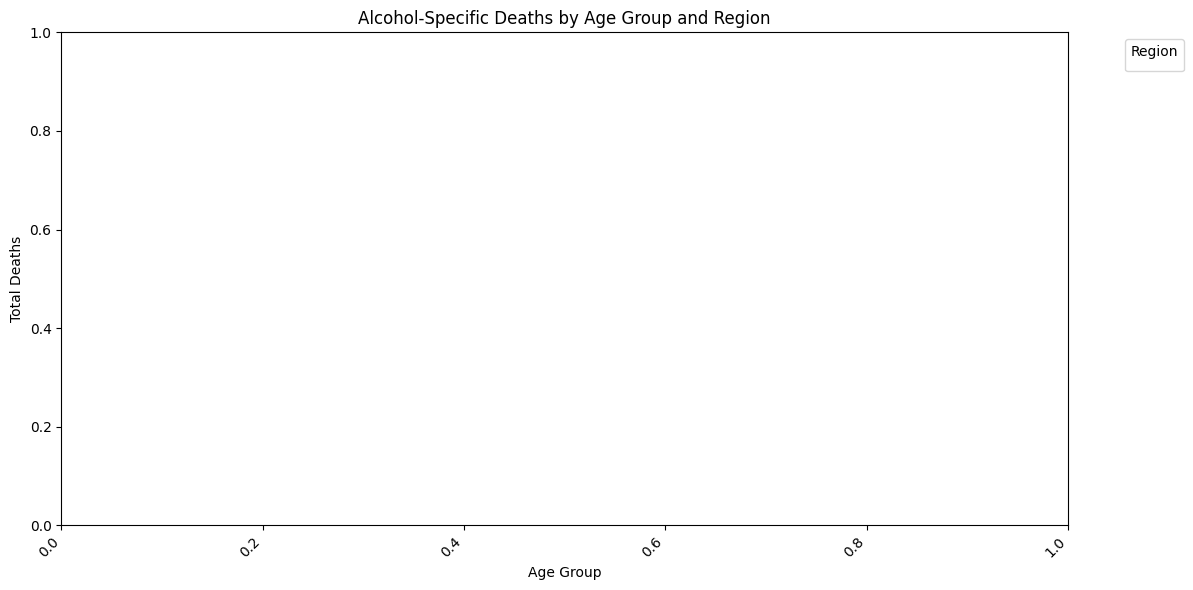

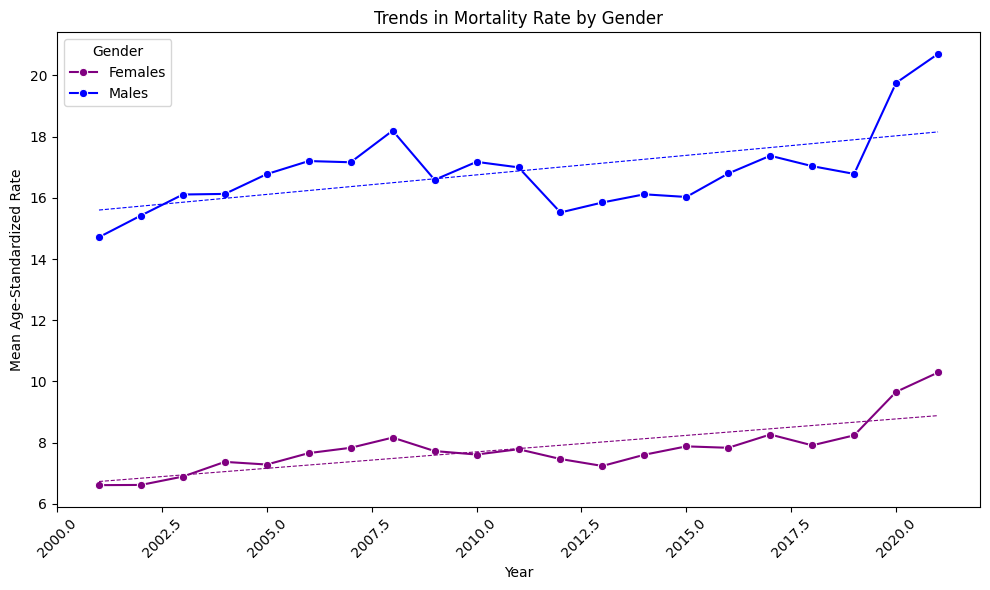

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Plot top 10 regions by age-standardized rate
top_regions = regional_analysis.nlargest(10, "mean_rate")

plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_regions,
    x="mean_rate",
    y="Area_Name",
    palette="Blues_d",
    order=top_regions.sort_values("mean_rate", ascending=True)["Area_Name"]
)
plt.title("Top 10 Regions by Age-Standardized Mortality Rate")
plt.xlabel("Mean Age-Standardized Rate")
plt.ylabel("Region")
plt.show()

# Top 10 causes of death
top_causes = (
    data_long.groupby("cause")
    .agg(Total_Deaths=("Deaths", "sum"))
    .reset_index()
    .sort_values("Total_Deaths", ascending=False)
    .head(10)
)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_causes,
    x="Total_Deaths",
    y="cause",
    palette="viridis",
    order=top_causes.sort_values("Total_Deaths", ascending=True)["cause"]
)
plt.title("Top 10 Causes of Death")
plt.xlabel("Total Deaths")
plt.ylabel("Cause of Death")
plt.show()

# Correlation matrix for numeric data
numeric_data = data_long.select_dtypes(include=["number"])
cor_matrix = numeric_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(cor_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

# Alcohol-Specific Deaths by Age Group and Region
plt.figure(figsize=(12, 6))
sns.barplot(
    data=total_deaths_summary,
    x="Age_Group",
    y="Total_Deaths",
    hue="Region",
    dodge=True
)
plt.title("Alcohol-Specific Deaths by Age Group and Region")
plt.xlabel("Age Group")
plt.ylabel("Total Deaths")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

# Trends in Mortality Rate by Gender
gender_analysis_filtered = gender_analysis[gender_analysis["Sex"].isin(["Males", "Females"])]

plt.figure(figsize=(10, 6))
sns.lineplot(
    data=gender_analysis_filtered,
    x="Year",
    y="mean_rate",
    hue="Sex",
    marker="o",
    linewidth=1.5,
    palette={"Females": "purple", "Males": "blue"}
)
sns.regplot(
    data=gender_analysis_filtered[gender_analysis_filtered["Sex"] == "Males"],
    x="Year",
    y="mean_rate",
    scatter=False,
    color="blue",
    line_kws={"linestyle": "dashed", "linewidth": 0.8},
    ci=None
)
sns.regplot(
    data=gender_analysis_filtered[gender_analysis_filtered["Sex"] == "Females"],
    x="Year",
    y="mean_rate",
    scatter=False,
    color="purple",
    line_kws={"linestyle": "dashed", "linewidth": 0.8},
    ci=None
)
plt.title("Trends in Mortality Rate by Gender")
plt.xlabel("Year")
plt.ylabel("Mean Age-Standardized Rate")
plt.legend(title="Gender", loc="upper left")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [15]:
import pandas as pd

# Data Preprocessing: Aggregating by Year, Age Group, and Sex, and summing the Deaths
agg_data = (
    data_long.groupby(["Year", "Age_Group", "Sex"])
    .agg(Total_Deaths=("Deaths", "sum"))
    .reset_index()
)

# Checking out the top causes of death (Alcohol-related)
top_causes = (
    data_long.groupby("cause")
    .agg(Total_Deaths=("Deaths", "sum"))
    .reset_index()
    .sort_values("Total_Deaths", ascending=False)
)

# Display unique values for Region, Age Group, and Sex
print("Unique Regions:", data_long["Region"].unique())
print("Unique Age Groups:", data_long["Age_Group"].unique())
print("Unique Sex Categories:", data_long["Sex"].unique())

# Count missing values in Region, Age Group, and Sex
print("Missing values in Region:", data_long["Region"].isna().sum())
print("Missing values in Age Group:", data_long["Age_Group"].isna().sum())
print("Missing values in Sex:", data_long["Sex"].isna().sum())

# Display the structure of Region, Age Group, and Sex
print("Data type of 'Region':", data_long["Region"].dtype)
print("Data type of 'Age_Group':", data_long["Age_Group"].dtype)
print("Data type of 'Sex':", data_long["Sex"].dtype)


Unique Regions: [], Categories (5, object): ['England', 'Northern Ireland', 'Scotland', 'United Kingdom', 'Wales']
Unique Age Groups: []
Unique Sex Categories: [], Categories (4, object): ['Females', 'Males', 'Persons', 'Sex']
Missing values in Region: 0
Missing values in Age Group: 0
Missing values in Sex: 0
Data type of 'Region': category
Data type of 'Age_Group': object
Data type of 'Sex': category


<ipython-input-15-a6a2d554f418>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_long.groupby(["Year", "Age_Group", "Sex"])


<ipython-input-16-ed216bc0b893>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_long.groupby(["Year", "Age_Group", "Region"])
<ipython-input-16-ed216bc0b893>:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc="upper left")


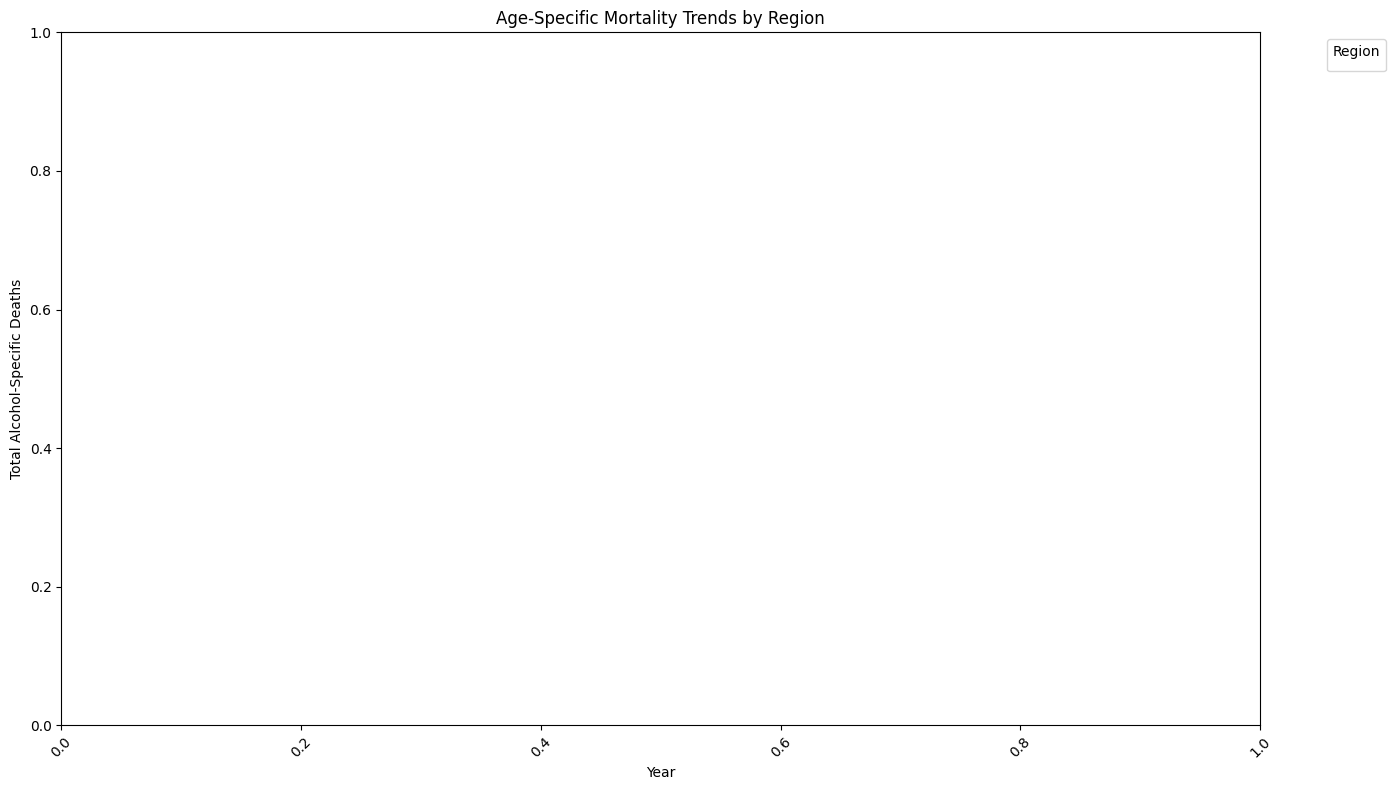

KeyError: "['All ages'] not in index"

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing: Summarizing by Year, Age Group, and Region
age_group_region_trends = (
    data_long.groupby(["Year", "Age_Group", "Region"])
    .agg(Total_Deaths=("Deaths", "sum"))
    .reset_index()
)

# Plot: Age-Specific Mortality Trends by Region
plt.figure(figsize=(14, 8))
sns.lineplot(
    data=age_group_region_trends,
    x="Year",
    y="Total_Deaths",
    hue="Region"
)
plt.title("Age-Specific Mortality Trends by Region")
plt.xlabel("Year")
plt.ylabel("Total Alcohol-Specific Deaths")
plt.xticks(rotation=45)
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

# Convert Sex to numeric values for correlation
data_long["Sex_numeric"] = data_long["Sex"].astype("category").cat.codes

# Calculate correlation matrix
cor_data = data_long[["Deaths", "Sex_numeric", "Year", "All ages"]].corr(method="pearson")
print("Correlation Matrix:")
print(cor_data)

# Summarize total deaths by year and region
yearly_deaths_summary = (
    data_long.groupby(["Year", "Region"])
    .agg(Total_Deaths=("Deaths", "sum"))
    .reset_index()
)
print("Yearly Deaths Summary:")
print(yearly_deaths_summary)

# Summarize deaths by Year and Age Group
age_group_contribution = (
    data_long.groupby(["Year", "Age_Group"])
    .agg(Total_Deaths=("Deaths", "sum"))
    .reset_index()
)

# Summarize the proportion of alcohol-specific deaths by sex
sex_proportions = (
    data_long.groupby("Sex")
    .agg(Total_Deaths=("Deaths", "sum"))
    .reset_index()
)
sex_proportions["Proportion"] = sex_proportions["Total_Deaths"] / sex_proportions["Total_Deaths"].sum()

# Print the proportions table
print("Sex Proportions:")
print(sex_proportions)

# Plot: Proportion of alcohol-specific deaths by sex
plt.figure(figsize=(8, 6))
sns.barplot(
    data=sex_proportions,
    x="Sex",
    y="Proportion",
    palette="viridis"
)
plt.title("Proportion of Alcohol-Specific Deaths by Sex")
plt.xlabel("Sex")
plt.ylabel("Proportion of Total Deaths")
plt.tight_layout()
plt.show()

# Summarizing total deaths by Region and Year for heatmap data
heatmap_data = (
    data_long.groupby(["Year", "Region"])
    .agg(Total_Deaths=("Deaths", "sum"))
    .reset_index()
)
print("Heatmap Data:")
print(heatmap_data)

# Summarizing deaths by Cause, Region, and Age Group
cause_analysis = (
    data_long.groupby(["cause", "Region", "Age_Group"])
    .agg(Total_Deaths=("Deaths", "sum"))
    .reset_index()
    .query("Total_Deaths > 100")
)

# Visualize the total deaths by cause and region
plt.figure(figsize=(14, 8))
sns.barplot(
    data=cause_analysis,
    x="cause",
    y="Total_Deaths",
    hue="Region"
)
plt.title("Total Alcohol-Specific Deaths by Cause and Region")
plt.xlabel("Cause of Death")
plt.ylabel("Total Deaths")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

# Summarize total deaths by cause (Top 10 causes)
top_causes = (
    data_long.groupby("cause")
    .agg(Total_Deaths=("Deaths", "sum"))
    .reset_index()
    .sort_values("Total_Deaths", ascending=False)
    .head(10)
)
print("Top Causes of Deaths:")
print(top_causes)

# Plot: Top 10 Causes of Alcohol-Specific Deaths
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_causes,
    x="Total_Deaths",
    y="cause",
    palette="viridis",
    order=top_causes.sort_values("Total_Deaths", ascending=True)["cause"]
)
plt.title("Top 10 Causes of Alcohol-Specific Deaths")
plt.xlabel("Total Deaths")
plt.ylabel("Cause of Death")
plt.tight_layout()
plt.show()

# Identify the major cause in each region
major_cause_by_region = (
    data_long.groupby(["Region", "cause"])
    .agg(Total_Deaths=("Deaths", "sum"))
    .reset_index()
    .sort_values(["Region", "Total_Deaths"], ascending=[True, False])
    .groupby("Region")
    .head(1)
)
print("Major Cause by Region:")
print(major_cause_by_region)

# Plot the major cause in each region
plt.figure(figsize=(10, 6))
sns.barplot(
    data=major_cause_by_region,
    x="Total_Deaths",
    y="Region",
    hue="cause",
    palette="viridis"
)
plt.title("Major Cause of Alcohol-Specific Deaths by Region")
plt.xlabel("Total Deaths")
plt.ylabel("Region")
plt.legend(title="Cause of Death", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Inspect the structure of both datasets
print("Main Data:")
print(main_data.info())
print("\nSupplementary Data:")
print(supplementary_data.info())

# Check for missing values in both datasets
main_missing = main_data.isna().sum()
supplementary_missing = supplementary_data.isna().sum()

print("\nMissing Values in Main Dataset:")
print(main_missing)
print("\nMissing Values in Supplementary Dataset:")
print(supplementary_missing)

# Data type conversion
main_data = main_data.astype({"Year": "float", "Deaths": "float", "All ages": "float"})
main_data["Sex"] = main_data["Sex"].astype("category")
main_data["Region"] = main_data["Region"].astype("category")

supplementary_data = supplementary_data.astype({
    "Year": "float",
    "Death_Count": "float",
    "Age_Rate": "float",
    "Lower_Confidence_Interval": "float",
    "Upper_Confidence_Interval": "float"
})
supplementary_data["Sex"] = supplementary_data["Sex"].astype("category")

# Merge datasets on Year and Sex
merged_data = pd.merge(main_data, supplementary_data, on=["Year", "Sex"], how="inner")

# Summarize basic statistics for numerical variables
numerical_summary = merged_data.agg({
    "Deaths": ["sum", "mean", "median", "max", "min", "std"],
    "Age_Rate": ["mean", "std"]
})
print("\nNumerical Summary:")
print(numerical_summary)

# Grouped summaries by Region and Age Group
grouped_summary = (
    merged_data.groupby(["Region", "Age_Group"])
    .agg(
        Total_Deaths=("Deaths", "sum"),
        Avg_Age_Rate=("Age_Rate", "mean"),
        Deaths_Rate_Correlation=lambda x: x.corr(merged_data.loc[x.index, "Age_Rate"])
    )
    .reset_index()
    .sort_values(by="Total_Deaths", ascending=False)
)
print("\nGrouped Summary by Region and Age Group:")
print(grouped_summary)

# Correlation Matrix
numerical_cols = merged_data.select_dtypes(include=["float", "int"])
correlation_matrix = numeric


Main Data:


NameError: name 'main_data' is not defined

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Inspect the structure of both datasets
print("Main Data:")
print(main_data.info())
print("\nSupplementary Data:")
print(supplementary_data.info())

# Check for missing values in both datasets
main_missing = main_data.isna().sum()
supplementary_missing = supplementary_data.isna().sum()

print("\nMissing Values in Main Dataset:")
print(main_missing)
print("\nMissing Values in Supplementary Dataset:")
print(supplementary_missing)

# Data type conversion
main_data = main_data.astype({"Year": "float", "Deaths": "float", "All ages": "float"})
main_data["Sex"] = main_data["Sex"].astype("category")
main_data["Region"] = main_data["Region"].astype("category")

supplementary_data = supplementary_data.astype({
    "Year": "float",
    "Death_Count": "float",
    "Age_Rate": "float",
    "Lower_Confidence_Interval": "float",
    "Upper_Confidence_Interval": "float"
})
supplementary_data["Sex"] = supplementary_data["Sex"].astype("category")

# Merge datasets on Year and Sex
merged_data = pd.merge(main_data, supplementary_data, on=["Year", "Sex"], how="inner")

# Summarize basic statistics for numerical variables
numerical_summary = merged_data.agg({
    "Deaths": ["sum", "mean", "median", "max", "min", "std"],
    "Age_Rate": ["mean", "std"]
})
print("\nNumerical Summary:")
print(numerical_summary)

# Grouped summaries by Region and Age Group
grouped_summary = (
    merged_data.groupby(["Region", "Age_Group"])
    .agg(
        Total_Deaths=("Deaths", "sum"),
        Avg_Age_Rate=("Age_Rate", "mean"),
        Deaths_Rate_Correlation=lambda x: x.corr(merged_data.loc[x.index, "Age_Rate"])
    )
    .reset_index()
    .sort_values(by="Total_Deaths", ascending=False)
)
print("\nGrouped Summary by Region and Age Group:")
print(grouped_summary)

# Correlation Matrix
numerical_cols = merged_data.select_dtypes(include=["float", "int"])
correlation_matrix = numerical_cols.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Identify potential outliers using IQR for Deaths
q1 = merged_data["Deaths"].quantile(0.25)
q3 = merged_data["Deaths"].quantile(0.75)
iqr = q3 - q1

outlier_threshold_low = q1 - 1.5 * iqr
outlier_threshold_high = q3 + 1.5 * iqr

outliers = merged_data[
    (merged_data["Deaths"] < outlier_threshold_low) | (merged_data["Deaths"] > outlier_threshold_high)
]
print("\nOutliers in Deaths:")
print(outliers)

# Trend analysis across time for Death_Count and Age_Rate
trend_analysis = (
    merged_data.groupby("Year")
    .agg(
        Avg_Deaths=("Deaths", "mean"),
        Avg_Age_Rate=("Age_Rate", "mean"),
        Total_Deaths=("Deaths", "sum")
    )
    .reset_index()
)
print("\nTrend Analysis by Year:")
print(trend_analysis)

# Check for regional distribution
region_distribution = (
    merged_data.groupby("Region")
    .agg(Total_Deaths=("Deaths", "sum"))
    .reset_index()
)
print("\nRegional Death Distribution:")
print(region_distribution)

# Plot: Total deaths by region and age group
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_summary, x="Age_Group", y="Total_Deaths", hue="Region", dodge=True)
plt.title("Total Deaths by Region and Age Group")
plt.xlabel("Age Group")
plt.ylabel("Total Deaths")
plt.xticks(rotation=45)
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

# Heatmap for Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap of Variable Correlations")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Main Data:


NameError: name 'main_data' is not defined

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Split data into training (80%) and testing (20%) sets
train_data, test_data = train_test_split(data_long, test_size=0.2, random_state=123)

# Separate features and target for training
X_train = train_data.drop(columns=["Deaths", "Year", "cause", "code"])
y_train = train_data["Deaths"]

X_test = test_data.drop(columns=["Deaths", "Year", "cause", "code"])
y_test = test_data["Deaths"]

### Linear Regression Model
# Train the model
lm_model = LinearRegression()
lm_model.fit(X_train, y_train)

# Predictions on Test Data
lm_predictions = lm_model.predict(X_test)

# Evaluate Performance of Linear Regression
lm_rmse = np.sqrt(mean_squared_error(y_test, lm_predictions))
lm_r2 = r2_score(y_test, lm_predictions)

# Print Performance Metrics
print(f"Linear Regression RMSE: {lm_rmse}")
print(f"Linear Regression R-squared: {lm_r2}")

# Visualization: Actual vs Predicted for Linear Regression
plt.figure(figsize=(8, 6))
plt.scatter(y_test, lm_predictions, color="blue", alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", linewidth=2)
plt.title("Actual vs Predicted Deaths (Linear Regression)")
plt.xlabel("Actual Deaths")
plt.ylabel("Predicted Deaths")
plt.tight_layout()
plt.show()

# Residuals Plot for Linear Regression
lm_residuals = y_test - lm_predictions
plt.figure(figsize=(8, 6))
plt.scatter(lm_predictions, lm_residuals, color="blue", alpha=0.7)
plt.axhline(y=0, color="red", linestyle="dashed")
plt.title("Residuals Plot (Linear Regression)")
plt.xlabel("Predicted Deaths")
plt.ylabel("Residuals")
plt.tight_layout()
plt.show()

### Random Forest Model
# Train the Random Forest model
rf_model = RandomForestRegressor(random_state=123, n_estimators=100, max_depth=10)
rf_model.fit(X_train, y_train)

# Predictions on Test Data
rf_predictions = rf_model.predict(X_test)

# Evaluate Performance of Random Forest
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))
rf_r2 = r2_score(y_test, rf_predictions)

# Print Performance Metrics
print(f"Random Forest RMSE: {rf_rmse}")
print(f"Random Forest R-squared: {rf_r2}")

# Feature Importance from Random Forest
feature_importance = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": rf_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Feature Importance Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x="Importance", y="Feature", palette="viridis")
plt.title("Random Forest Feature Importance")
plt.tight_layout()
plt.show()

# Visualization: Actual vs Predicted for Random Forest
plt.figure(figsize=(8, 6))
plt.scatter(y_test, rf_predictions, color="blue", alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", linewidth=2)
plt.title("Actual vs Predicted Deaths (Random Forest)")
plt.xlabel("Actual Deaths")
plt.ylabel("Predicted Deaths")
plt.tight_layout()
plt.show()

# Residuals Plot for Random Forest
rf_residuals = y_test - rf_predictions
plt.figure(figsize=(8, 6))
plt.scatter(rf_predictions, rf_residuals, color="blue", alpha=0.7)
plt.axhline(y=0, color="red", linestyle="dashed")
plt.title("Residuals Plot (Random Forest)")
plt.xlabel("Predicted Deaths")
plt.ylabel("Residuals")
plt.tight_layout()
plt.show()

# Residual Histogram for Random Forest
plt.figure(figsize=(8, 6))
sns.histplot(rf_residuals, bins=30, kde=True, color="lightblue")
plt.title("Residuals of Random Forest Predictions")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.